In [1]:
#%% Instalar pacote adicional

!pip install patsy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 9.2 MB/s eta 0:00:00


In [2]:
#%% Carregar bibliotecas
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from funcoes_ajuda import avalia_clf


In [3]:
import patsy
import time
#%% Ler a base de dados
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#%% Criar a matriz de dados X e a variável resposta y usando patsy
y, X = patsy.dmatrices('survived ~ pclass + sex + age + sibsp + parch + fare + embarked', data=titanic, return_type="dataframe")

# Exiba as primeiras linhas da matriz de dados X
print(X.head())

# Exiba as primeiras linhas da variável resposta y
print(y.head())
#%% Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2360873)


   Intercept  sex[T.male]  embarked[T.Q]  embarked[T.S]  pclass   age  sibsp  \
0        1.0          1.0            0.0            1.0     3.0  22.0    1.0   
1        1.0          0.0            0.0            0.0     1.0  38.0    1.0   
2        1.0          0.0            0.0            1.0     3.0  26.0    0.0   
3        1.0          0.0            0.0            1.0     1.0  35.0    1.0   
4        1.0          1.0            0.0            1.0     3.0  35.0    0.0   

   parch     fare  
0    0.0   7.2500  
1    0.0  71.2833  
2    0.0   7.9250  
3    0.0  53.1000  
4    0.0   8.0500  
   survived
0       0.0
1       1.0
2       1.0
3       1.0
4       0.0


In [5]:
# Imprima as formas dos conjuntos de dados resultantes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (569, 9)
y_train shape: (569, 1)
X_test shape: (143, 9)
y_test shape: (143, 1)


In [6]:
#%% Treinar a Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50, random_state=42)


Base de treino:
A acurácia da árvore é: 99.1%
A acurácia balanceada da árvore é: 99.0%
AUC-ROC: 99.98%
GINI: 99.95%

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       350
         1.0       0.99      0.99      0.99       219

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



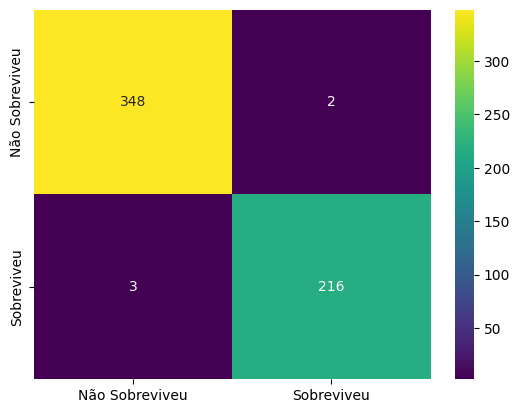

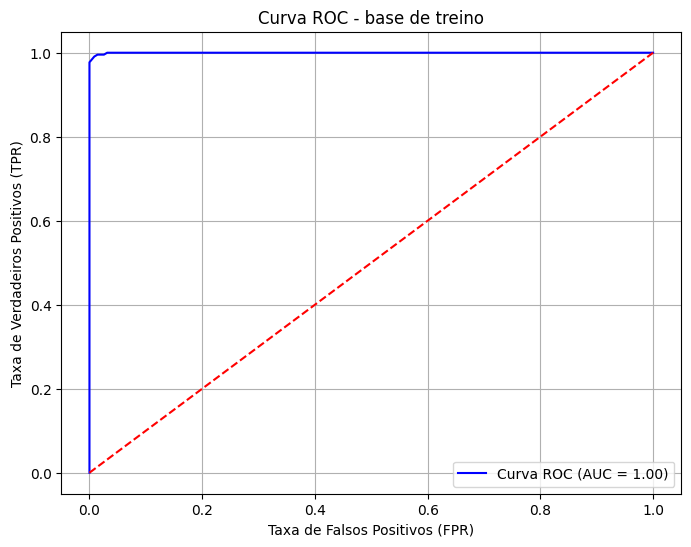


Base de teste:
A acurácia da árvore é: 79.0%
A acurácia balanceada da árvore é: 78.8%
AUC-ROC: 87.67%
GINI: 75.34%

               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        74
         1.0       0.81      0.74      0.77        69

    accuracy                           0.79       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.79      0.79      0.79       143



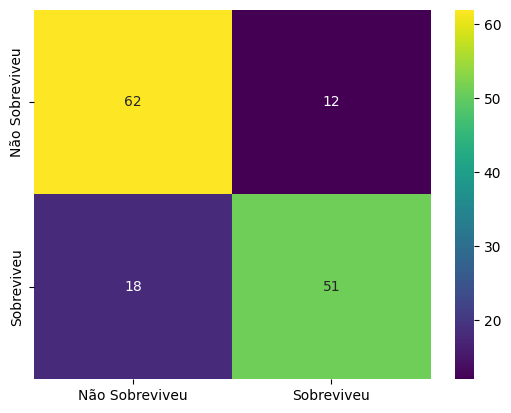

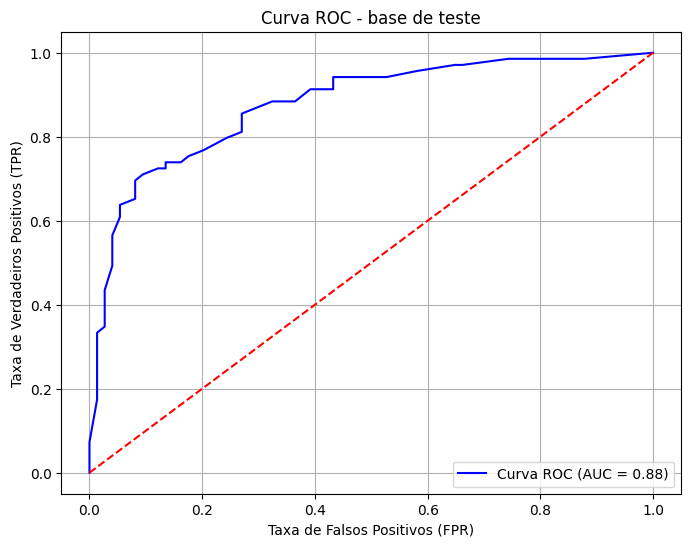

In [7]:
#%% # Criar data-frame de avaliação de treino e teste

avalia_clf(rf, y_train, X_train, rótulos_y=['Não Sobreviveu', 'Sobreviveu'], base = 'treino')
avalia_clf(rf, y_test, X_test, rótulos_y=['Não Sobreviveu', 'Sobreviveu'], base = 'teste')


In [8]:
#%% Montando a estrutura para um gridsearch

tempo_ini = time.time()

param_grid = {'n_estimators': [100], 'max_features': range(1, 11)}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=4, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel()) 

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': range(1, 11), 'n_estimators': [100]},
             scoring='roc_auc')

In [9]:
# Print the best parameters and the best score
print(grid_search)
print(grid_search.best_params_)
print(grid_search.best_score_)
tempo_fim = time.time()

melhor_modelo = grid_search.best_estimator_

print(f"Tempo de execução: {tempo_fim - tempo_ini} segundos")

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': range(1, 11), 'n_estimators': [100]},
             scoring='roc_auc')
{'max_features': 5, 'n_estimators': 100}
0.8339987024107323
Tempo de execução: 8.117589235305786 segundos



Base de treino:
A acurácia da árvore é: 99.1%
A acurácia balanceada da árvore é: 99.0%
AUC-ROC: 99.97%
GINI: 99.95%

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       350
         1.0       0.99      0.99      0.99       219

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



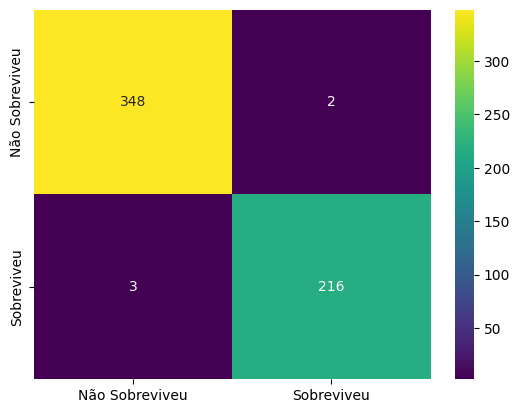

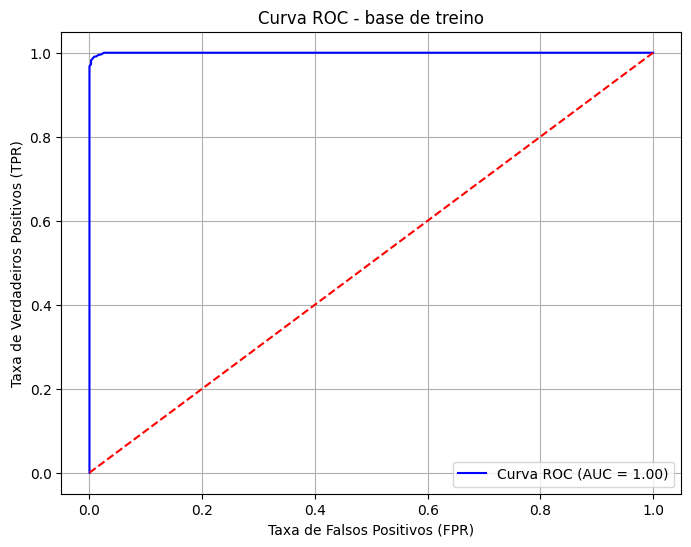


Base de teste:
A acurácia da árvore é: 79.0%
A acurácia balanceada da árvore é: 78.8%
AUC-ROC: 88.94%
GINI: 77.89%

               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        74
         1.0       0.81      0.74      0.77        69

    accuracy                           0.79       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.79      0.79      0.79       143



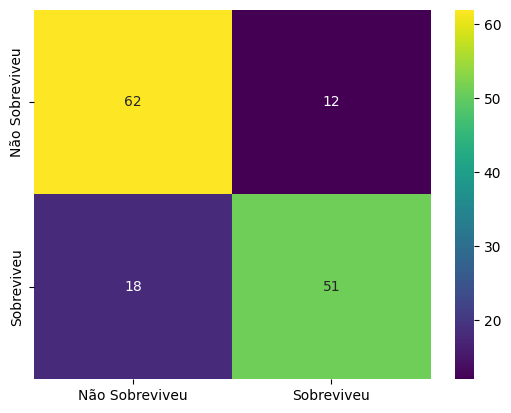

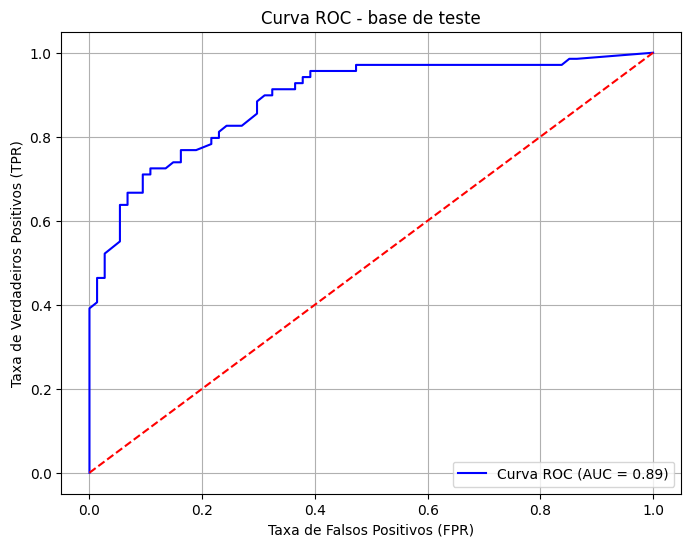

In [10]:
#%% Avaliar o modelo tunado
# aval_classificador(y_train, X_train, y_test, X_test, melhor_modelo)


avalia_clf(melhor_modelo, y_train, X_train, rótulos_y=['Não Sobreviveu', 'Sobreviveu'], base = 'treino')
avalia_clf(melhor_modelo, y_test, X_test, rótulos_y=['Não Sobreviveu', 'Sobreviveu'], base = 'teste')